In [1]:
import lib.matnpy.matnpyio as io

In [2]:
import collections
import os
from collections import defaultdict
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd

In [4]:
sess_no = '141014'
raw_path = '/media/rudy/disk2/lucy/'

In [5]:
tinfo_path = raw_path + sess_no + '/session01/trial_info.mat' 
rinfo_path = raw_path + sess_no + '/session01/recording_info.mat' 

In [6]:
dico_area_to_cortex = io.get_dico_area_to_cortex()

In [7]:
session = os.listdir(raw_path)
session.remove('unique_recordings.mat')
session = sorted(session)
print(session)

['141014', '141015', '141016', '141017', '141023', '141024', '141029', '141103', '141112', '141113', '141125', '141126', '141127', '141128', '141202', '141203', '141205', '141208', '141209', '141211', '141212', '141215', '141216', '141217', '141218', '150114', '150126', '150128', '150129', '150205', '150210', '150211', '150212', '150213', '150217', '150219', '150223', '150224', '150226', '150227', '150302', '150303', '150304', '150305', '150403', '150407', '150408', '150413', '150414', '150415', '150416', '150427', '150428', '150429', '150430', '150504', '150511', '150512', '150527', '150528', '150529', '150608']


In [8]:
dico_number_of_electrode = defaultdict(dict) # dict[sess_no][cortex] = number of electrode in the cortex for this sess

for sess_no in session : 
    tinfo_path = raw_path + sess_no + '/session01/trial_info.mat' 
    rinfo_path = raw_path + sess_no + '/session01/recording_info.mat' 
    area_names = io.get_area_names(rinfo_path)
    
    # c[area] = number of electrode in the area
    c = collections.Counter(area_names)
    
    
    target_dict = defaultdict(dict) # [cortex][area] = number of electrode
    for area in c :    
        target_dict[ dico_area_to_cortex[area] ][area] = c[area]
        
    for key in target_dict.keys():
        dico_number_of_electrode[key][sess_no] = sum(target_dict[key].values() )
        
        
        
        

In [9]:
dico_number_of_electrode

defaultdict(dict,
            {'Prefrontal': {'141014': 10,
              '141015': 11,
              '141016': 17,
              '141017': 18,
              '141023': 15,
              '141024': 16,
              '141029': 10,
              '141103': 15,
              '141112': 13,
              '141113': 16,
              '141125': 15,
              '141126': 15,
              '141127': 15,
              '141128': 15,
              '141202': 15,
              '141203': 9,
              '141205': 11,
              '141208': 14,
              '141209': 13,
              '141211': 14,
              '141212': 12,
              '141215': 10,
              '141216': 14,
              '141217': 13,
              '141218': 15,
              '150114': 10,
              '150126': 12,
              '150128': 10,
              '150129': 13,
              '150205': 11,
              '150210': 16,
              '150211': 17,
              '150212': 17,
              '150213': 16,
              '15

In [10]:
dico_number_of_areas = defaultdict(dict) # dict[cortex][sess_no] = number of electrode in the cortex for this sess

for sess_no in session : 
    tinfo_path = raw_path + sess_no + '/session01/trial_info.mat' 
    rinfo_path = raw_path + sess_no + '/session01/recording_info.mat' 
    area_names = io.get_area_names(rinfo_path)
    
    # c[area] = number of electrode in the area
    c = collections.Counter(area_names)
    
    
    target_dict = defaultdict(dict) # [cortex][area] = number of electrode
    for area in c :    
        target_dict[ dico_area_to_cortex[area] ][area] = c[area]
        
    for key in target_dict.keys():
        dico_number_of_areas[key][sess_no] = len((target_dict[key].values() ) )

In [11]:
dico_number_of_areas

defaultdict(dict,
            {'Prefrontal': {'141014': 5,
              '141015': 5,
              '141016': 7,
              '141017': 7,
              '141023': 7,
              '141024': 7,
              '141029': 6,
              '141103': 7,
              '141112': 6,
              '141113': 7,
              '141125': 6,
              '141126': 7,
              '141127': 7,
              '141128': 7,
              '141202': 6,
              '141203': 6,
              '141205': 5,
              '141208': 7,
              '141209': 7,
              '141211': 8,
              '141212': 7,
              '141215': 6,
              '141216': 9,
              '141217': 9,
              '141218': 9,
              '150114': 6,
              '150126': 8,
              '150128': 8,
              '150129': 8,
              '150205': 6,
              '150210': 9,
              '150211': 8,
              '150212': 8,
              '150213': 8,
              '150217': 8,
              '150219':

# Number of electrode

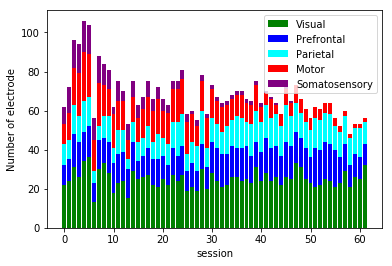

In [12]:
# Number of electrode
Visual = np.array( [dico_number_of_electrode['Visual'].get(sess_no, 0) for sess_no in session ])
Prefrontal = np.array( [dico_number_of_electrode['Prefrontal'].get(sess_no, 0) for sess_no in session ])
Parietal = np.array( [dico_number_of_electrode['Parietal'].get(sess_no, 0) for sess_no in session ])
Motor = np.array( [dico_number_of_electrode['Motor'].get(sess_no, 0) for sess_no in session ])
Somatosensory = np.array( [dico_number_of_electrode['Somatosensory'].get(sess_no, 0) for sess_no in session ])


width = 0.8
ind = np.arange(len(Visual))
p1 = plt.bar(ind,Visual, width, color ='green')
p2 = plt.bar(ind, Prefrontal, width, bottom=Visual, color='blue')
p3 = plt.bar(ind, Parietal, width, bottom=Visual+Prefrontal, color='cyan')
p4 = plt.bar(ind, Motor, width, bottom=Visual+Prefrontal+Parietal, color = 'red')
p5 = plt.bar(ind, Somatosensory, width, bottom=Visual+Prefrontal+Parietal+Motor, color ='purple')

plt.ylabel('Number of electrode')
plt.xlabel('session')
#plt.yticks(np.arange(0, 10))
plt.legend((p1[0], p2[0], p3[0], p4[0],p5[0]), 
           ('Visual', 'Prefrontal', 'Parietal', 'Motor', 'Somatosensory') )
#            color = ['green', 'blue', 'cyan','red','purple'])

plt.show()



# Number of areas

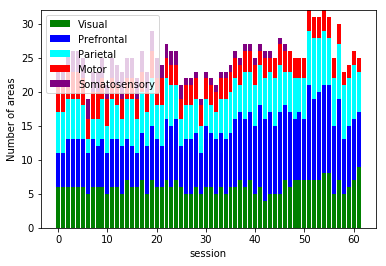

In [13]:
# Number of areas
Visual = np.array( [dico_number_of_areas['Visual'].get(sess_no, 0) for sess_no in session ])
Prefrontal = np.array( [dico_number_of_areas['Prefrontal'].get(sess_no, 0) for sess_no in session ])
Parietal = np.array( [dico_number_of_areas['Parietal'].get(sess_no, 0) for sess_no in session ])
Motor = np.array( [dico_number_of_areas['Motor'].get(sess_no, 0) for sess_no in session ])
Somatosensory = np.array( [dico_number_of_areas['Somatosensory'].get(sess_no, 0) for sess_no in session ])


width = 0.8
ind = np.arange(len(Visual))
p1 = plt.bar(ind,Visual, width, color ='green')
p2 = plt.bar(ind, Prefrontal, width, bottom=Visual, color='blue')
p3 = plt.bar(ind, Parietal, width, bottom=Visual+Prefrontal, color='cyan')
p4 = plt.bar(ind, Motor, width, bottom=Visual+Prefrontal+Parietal, color = 'red')
p5 = plt.bar(ind, Somatosensory, width, bottom=Visual+Prefrontal+Parietal+Motor, color ='purple')

plt.ylabel('Number of areas')
plt.xlabel('session')
#plt.yticks(np.arange(0, 10))
plt.legend((p1[0], p2[0], p3[0], p4[0],p5[0]), 
           ('Visual', 'Prefrontal', 'Parietal', 'Motor', 'Somatosensory') )
#            color = ['green', 'blue', 'cyan','red','purple'])

plt.show()



# Number of electrode by areas

In [14]:
dico_area_to_cortex = io.get_dico_area_to_cortex()

dico_color = {}

dico_color['Prefrontal'] = 'blue'
dico_color['Parietal'] = 'cyan'
dico_color['Visual'] = 'green'
dico_color['Motor'] = 'red'
dico_color['Somatosensory'] = 'purple' 

dico_color['Auditory'] = 'brown'
dico_color['Subcortical'] = 'yellow'
dico_color['Temporal'] = 'orange'

columns_names = ['sess_no', 'area', 'count', 'cortex', 'color_code']
data = []
all_areas = dico_area_to_cortex.keys()
for sess_no in session :
    rinfo_path = raw_path + sess_no + '/session01/recording_info.mat' 
    area_names = io.get_area_names(rinfo_path)
    counter=collections.Counter(area_names)
    for area in all_areas:
        if not area in counter :
            counter[area] = 0
    
    for area in counter:
        
        data.append( [sess_no, area, counter[area], dico_area_to_cortex[area], dico_color[dico_area_to_cortex[area] ] ] )
        
data = pd.DataFrame(data, columns=columns_names)

['Auditory' 'Motor' 'Parietal' 'Prefrontal' 'Somatosensory' 'Subcortical'
 'Temporal' 'Visual']


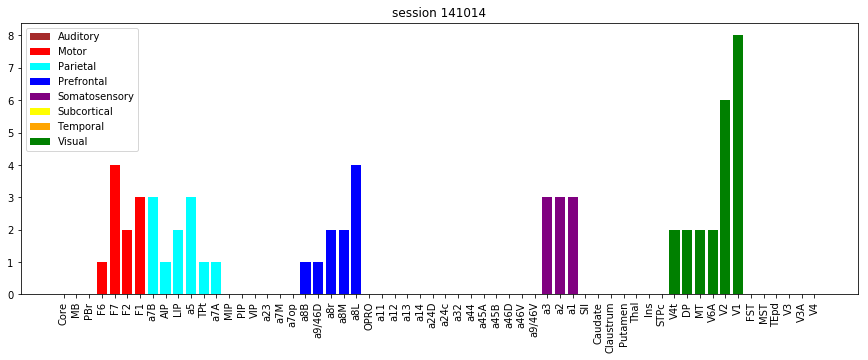

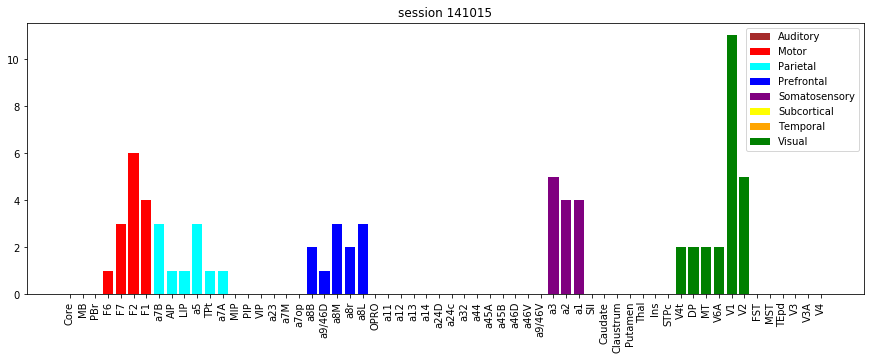

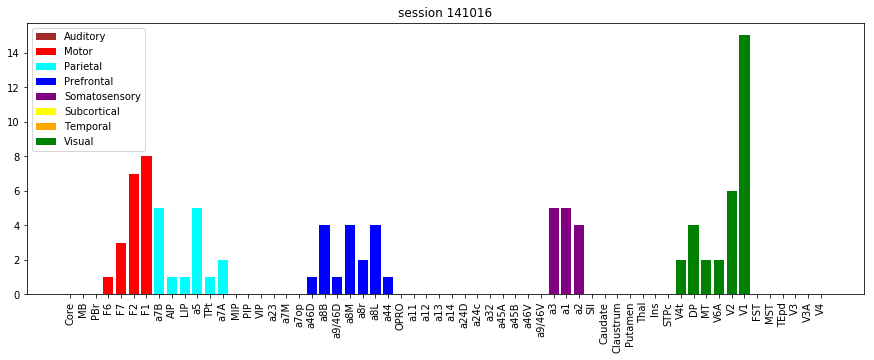

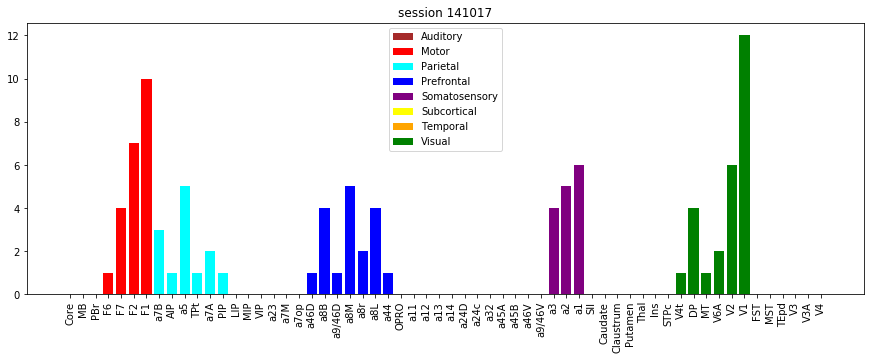

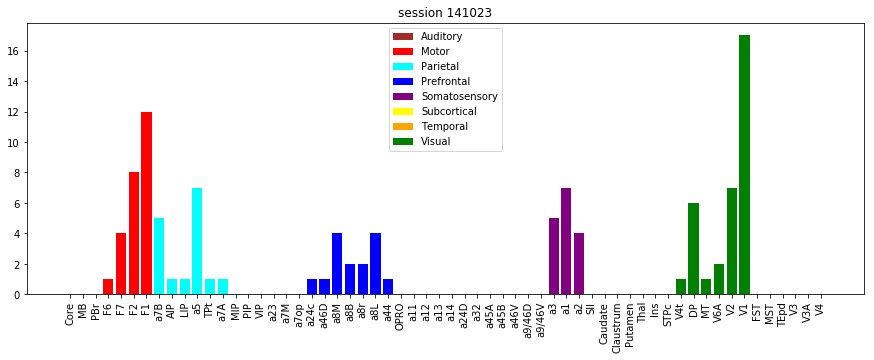

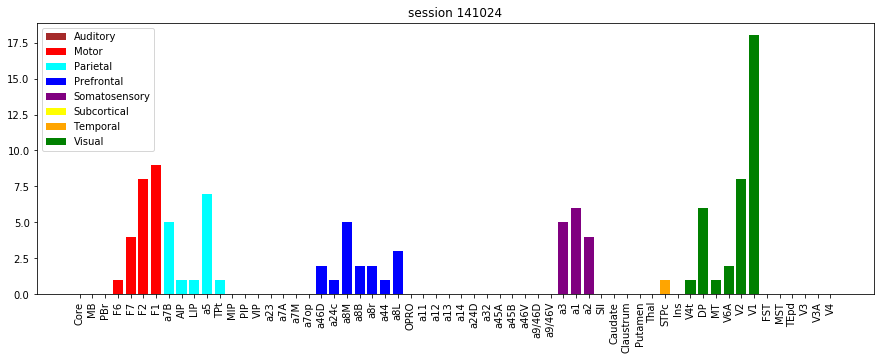

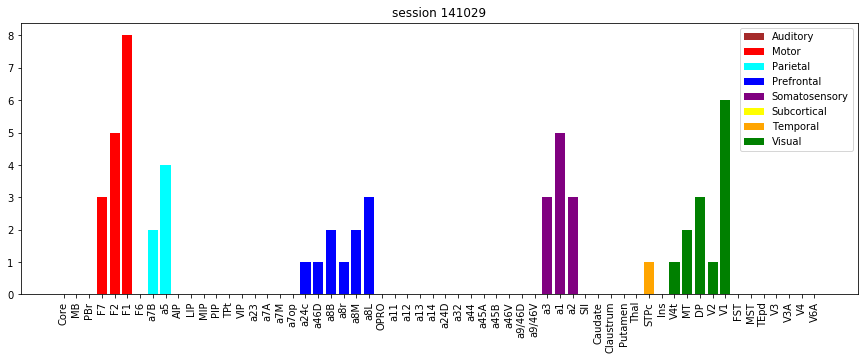

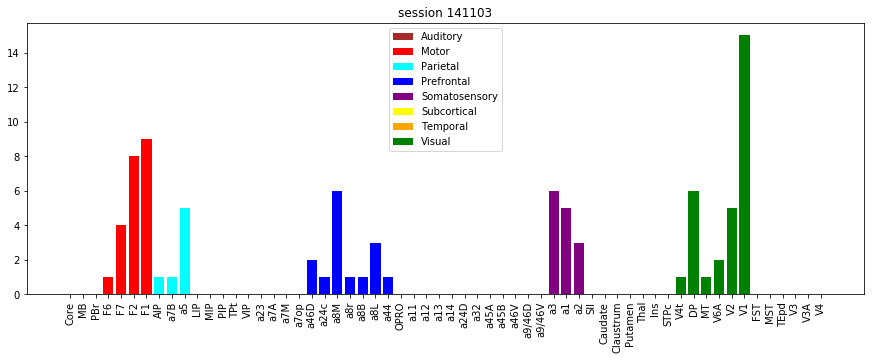

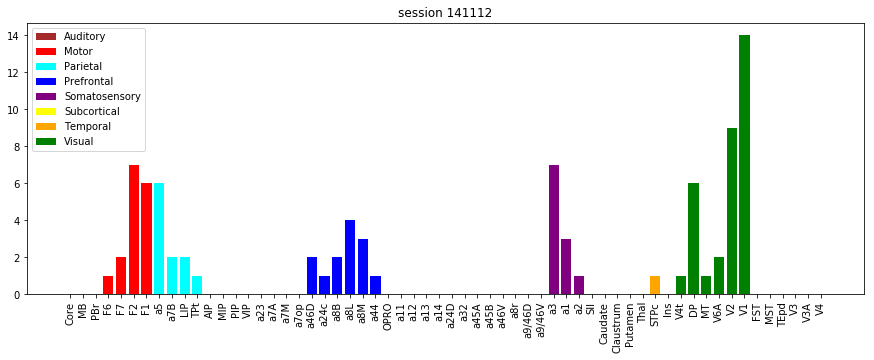

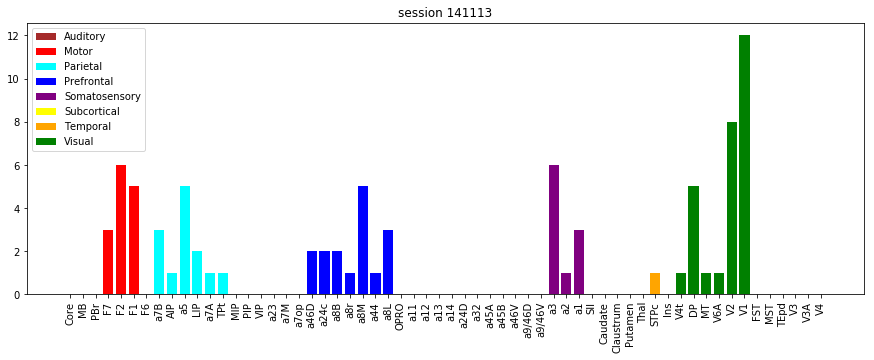

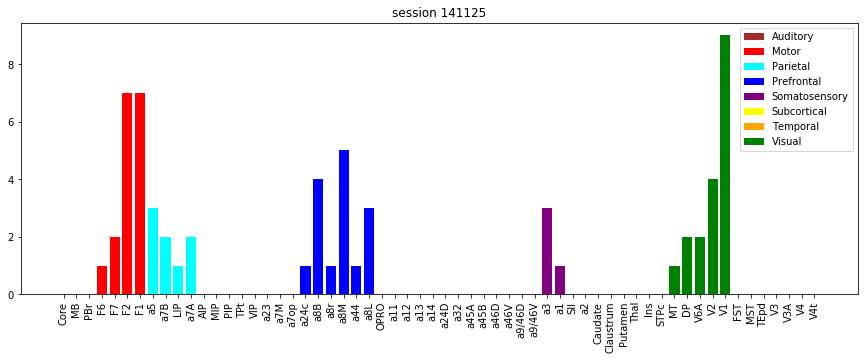

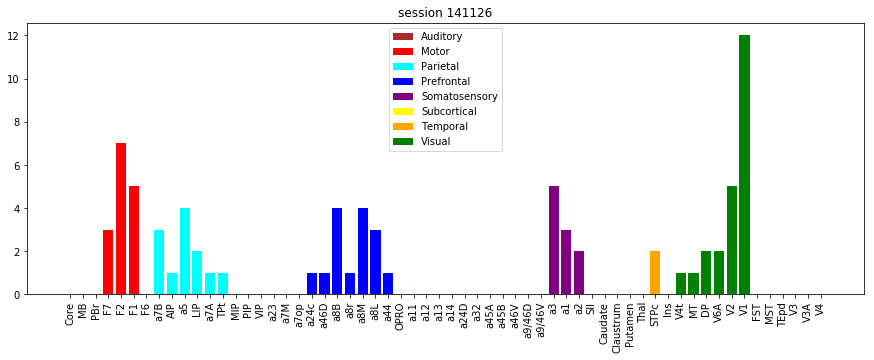

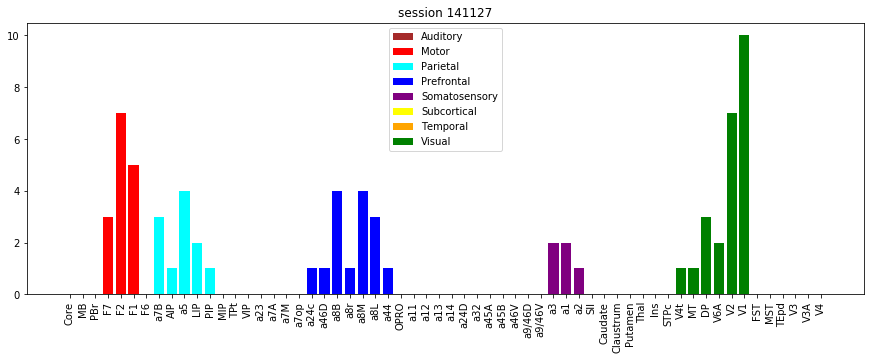

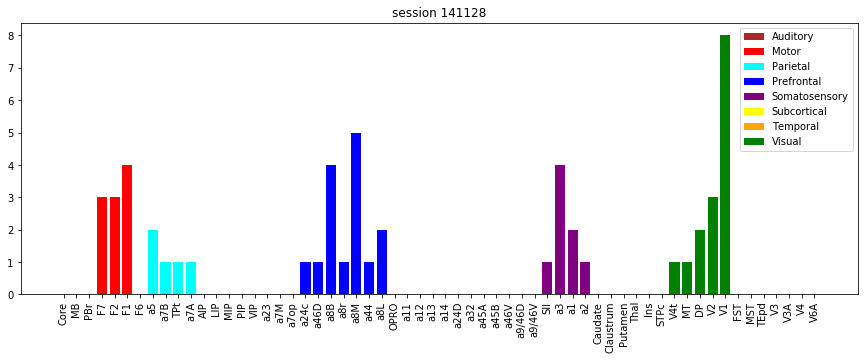

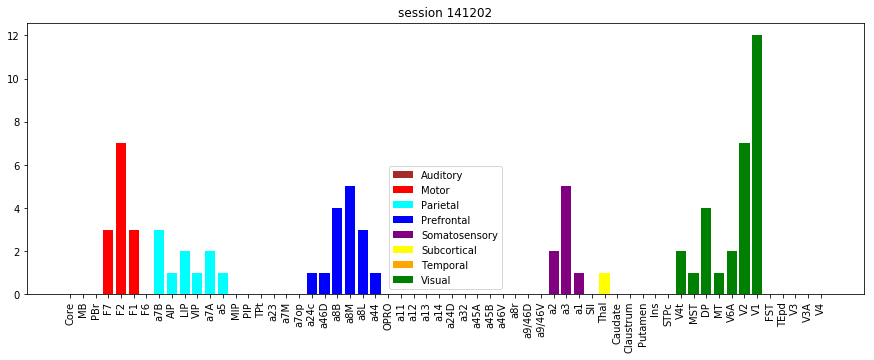

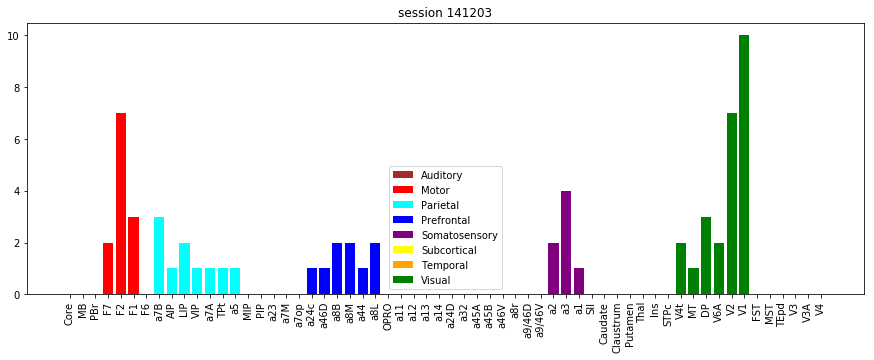

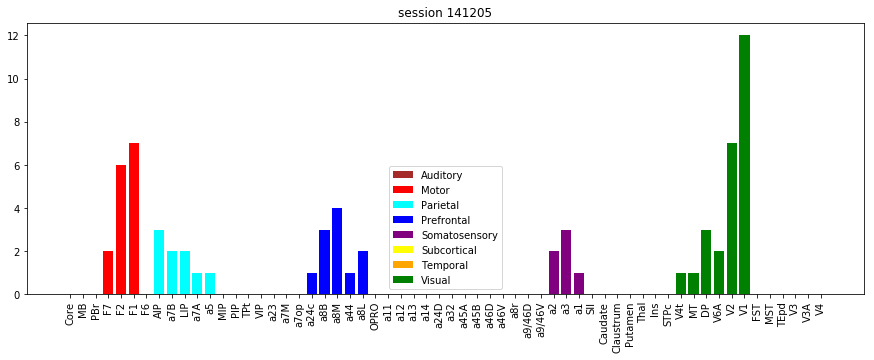

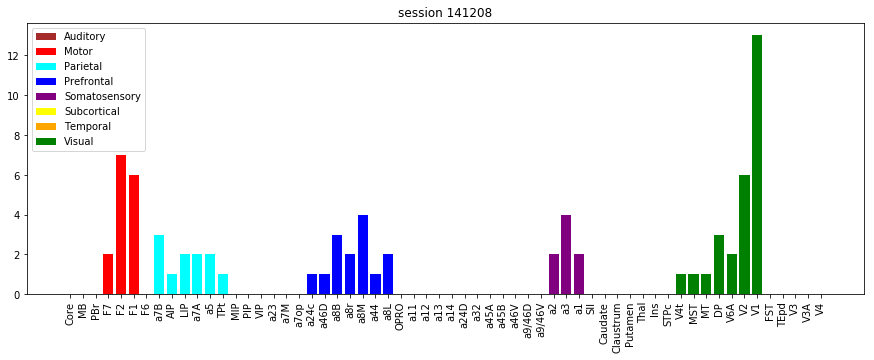

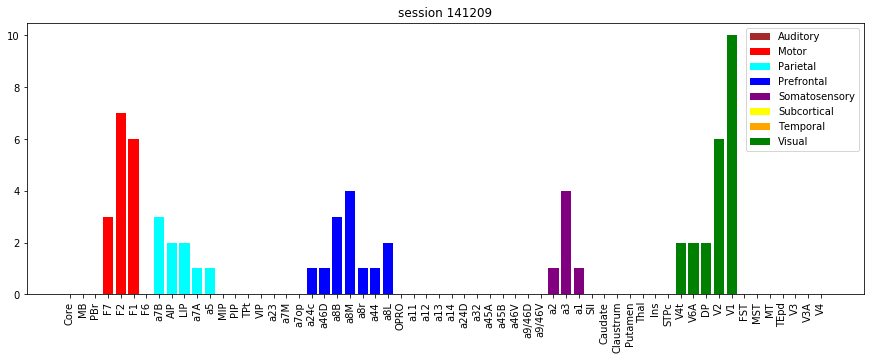

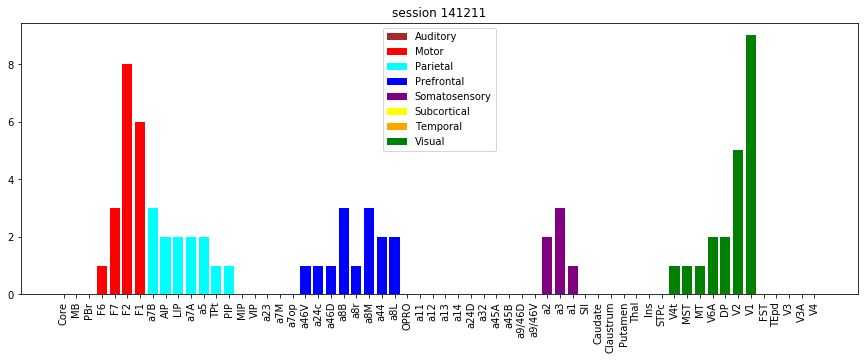

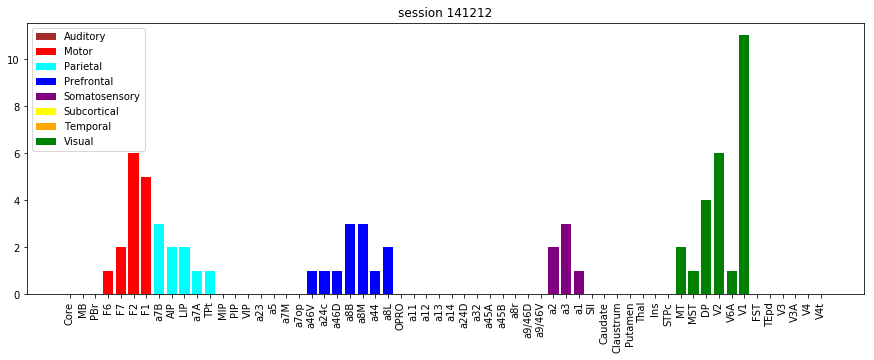

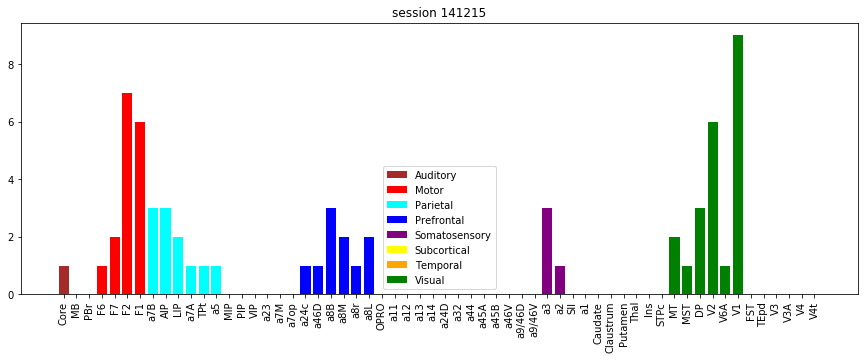

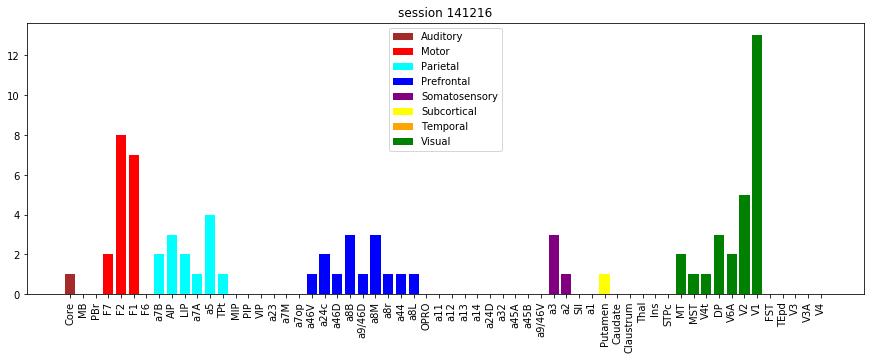

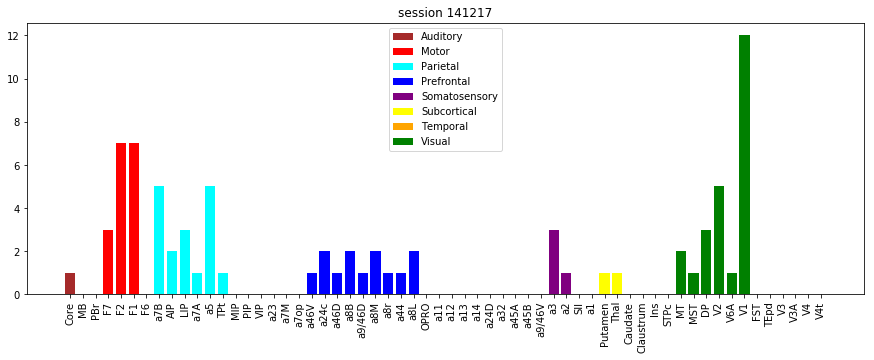

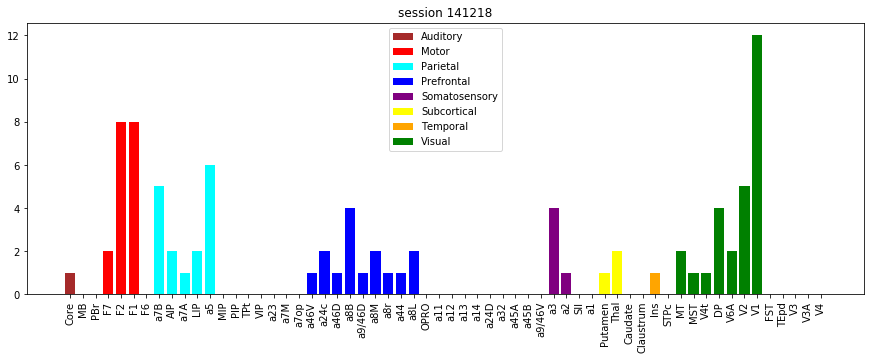

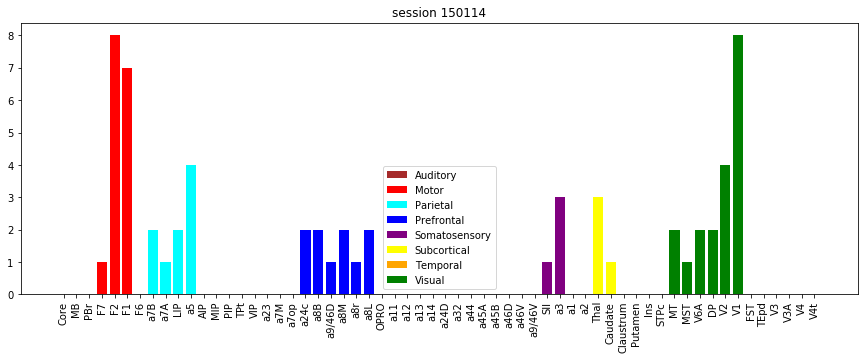

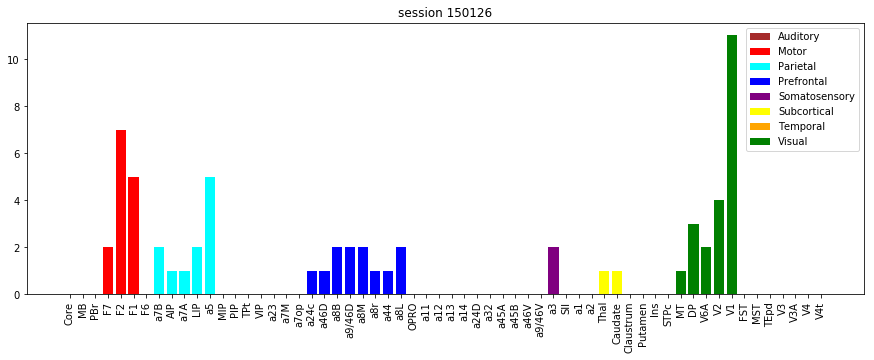

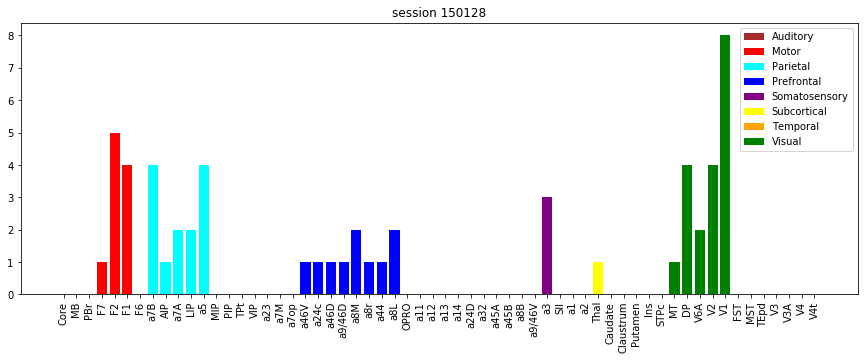

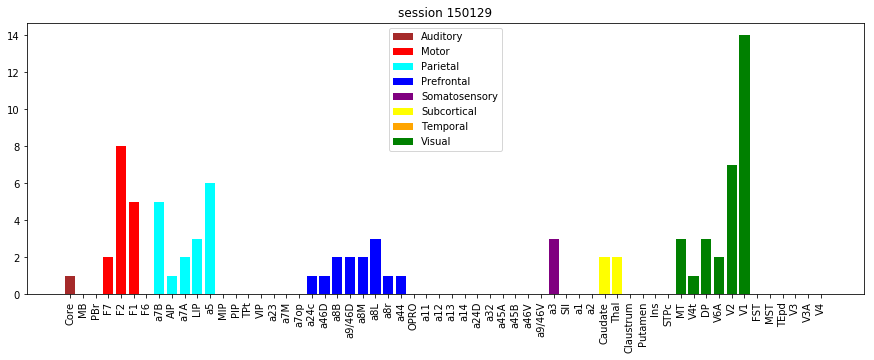

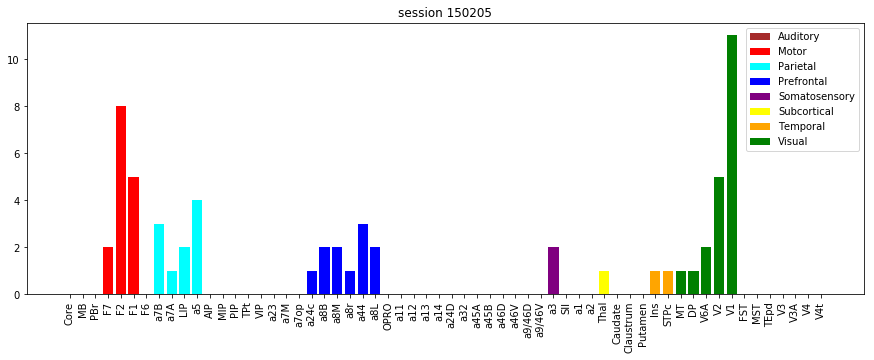

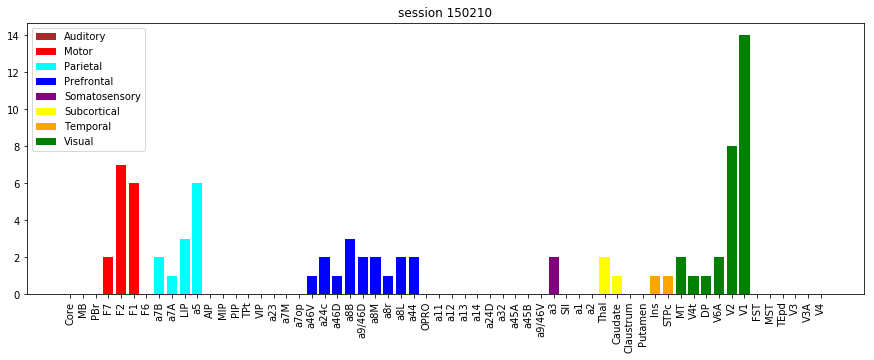

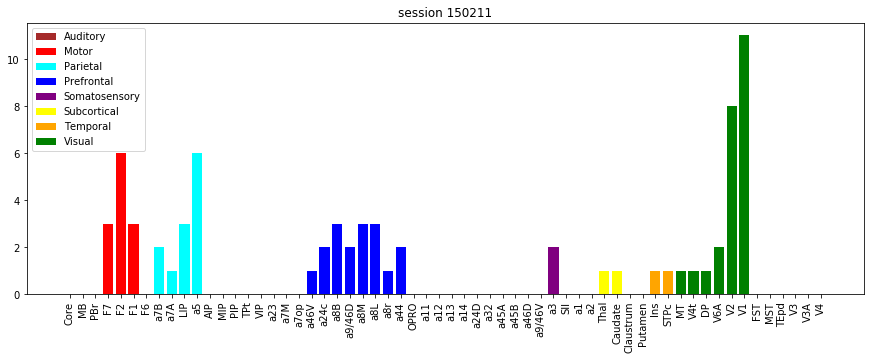

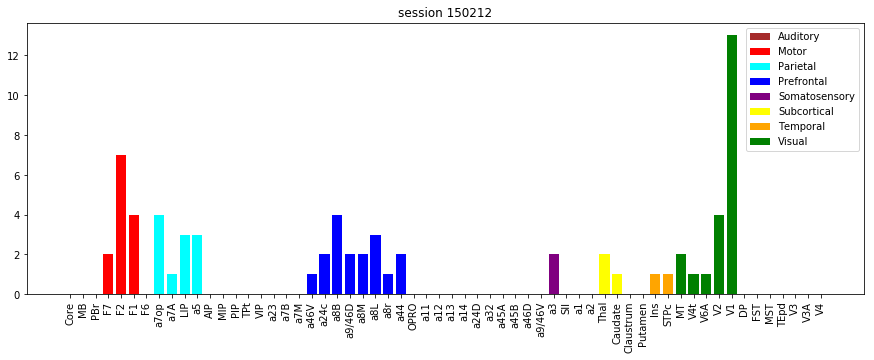

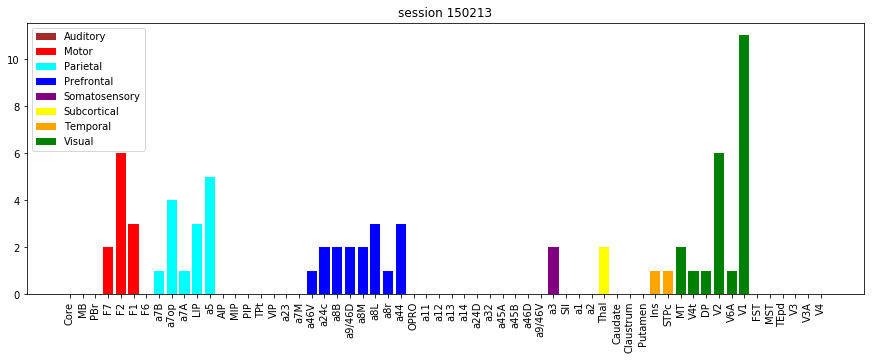

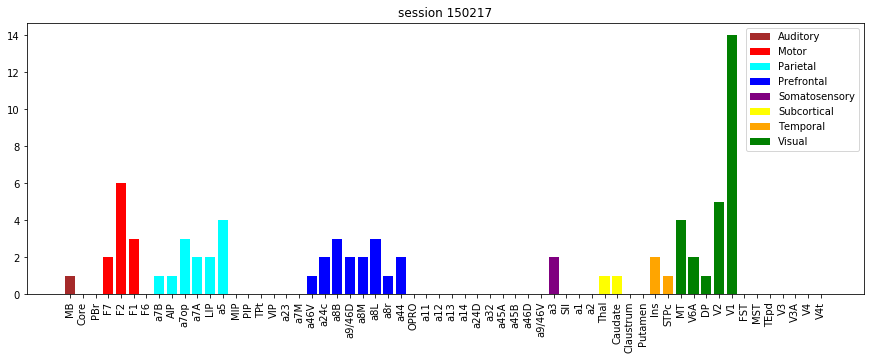

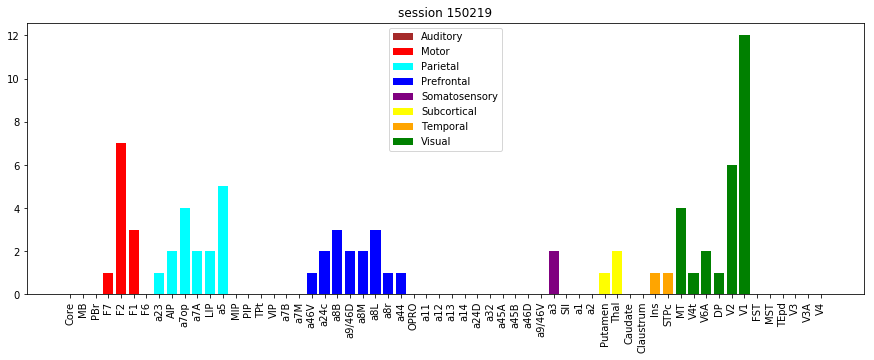

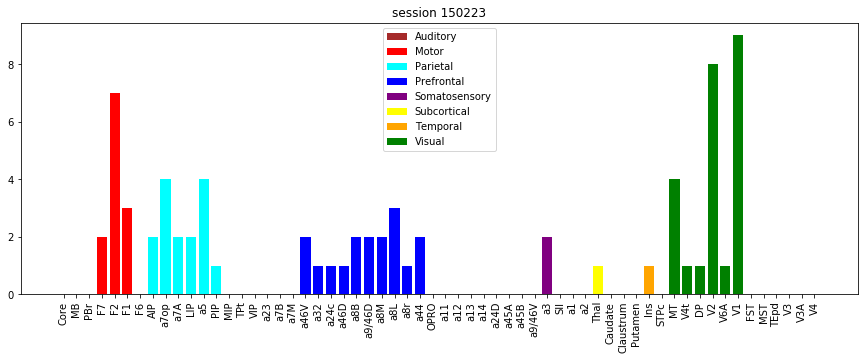

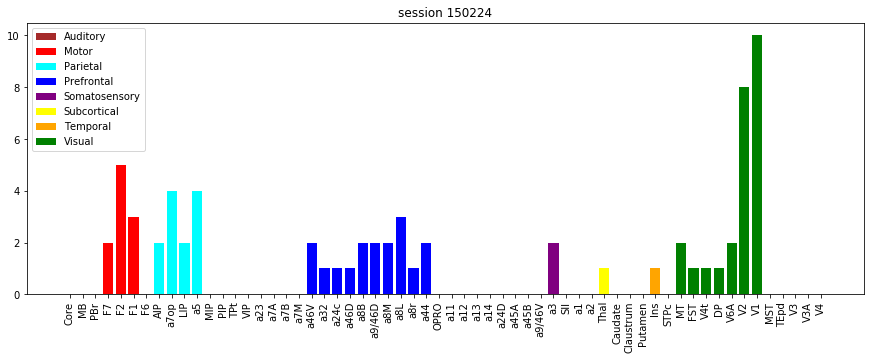

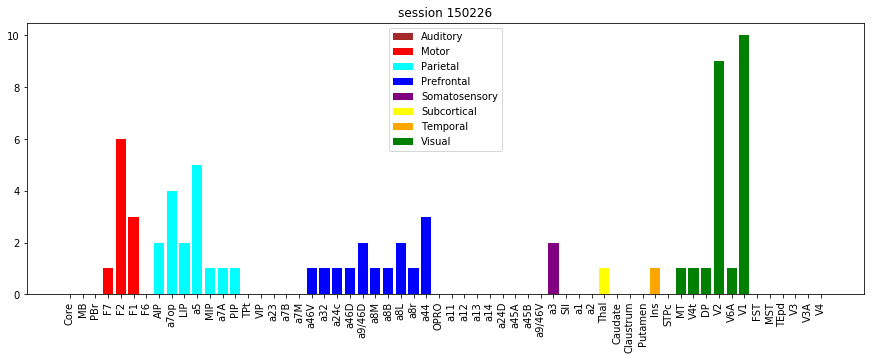

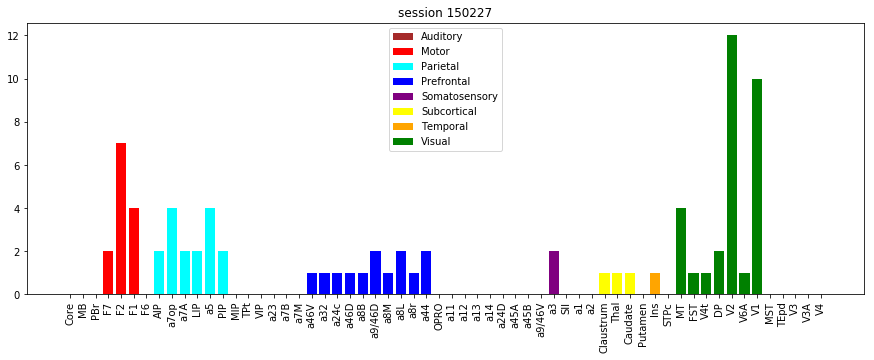

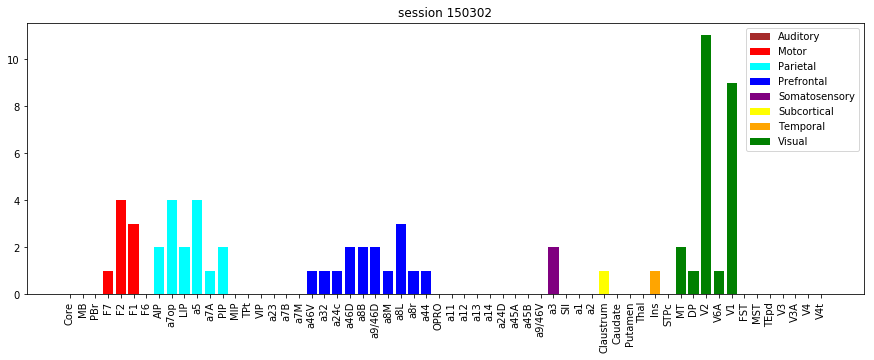

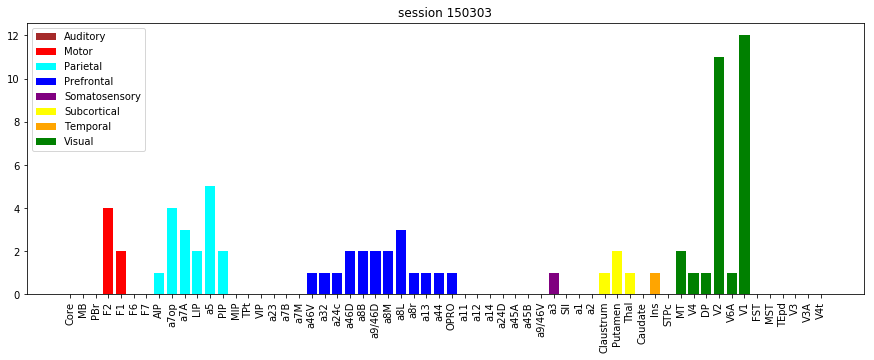

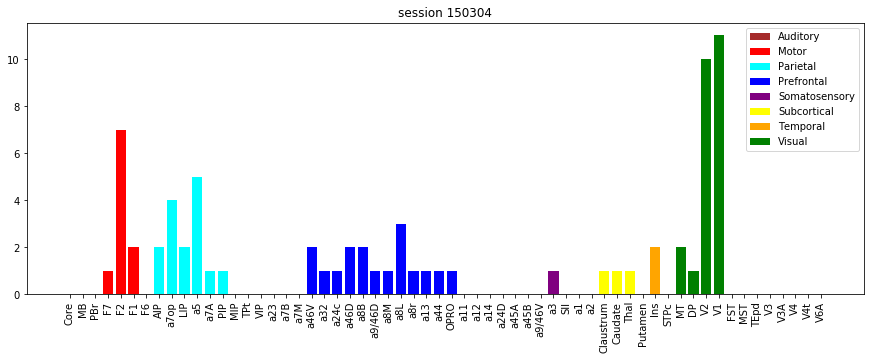

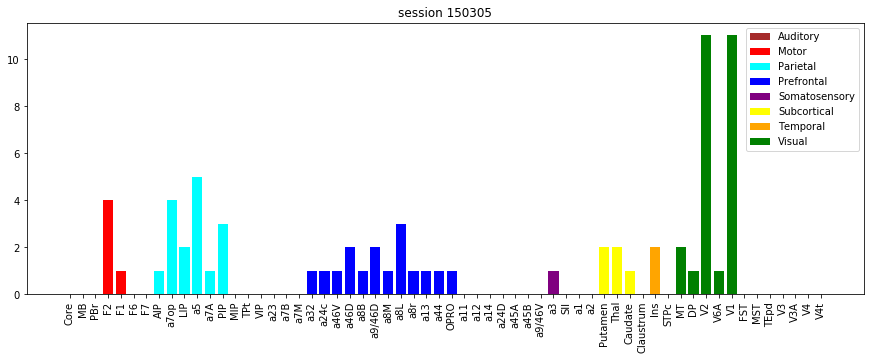

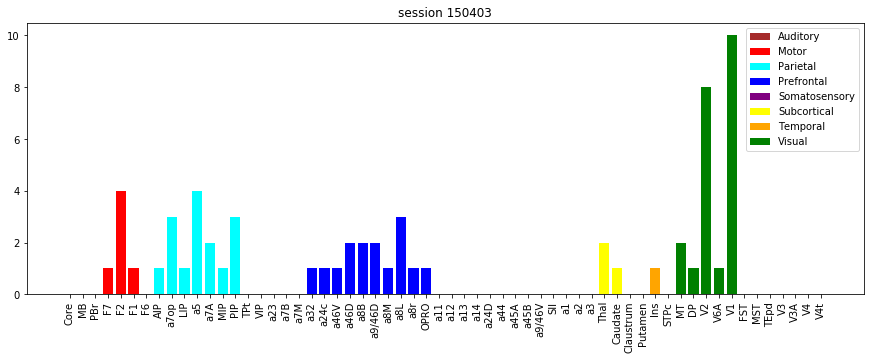

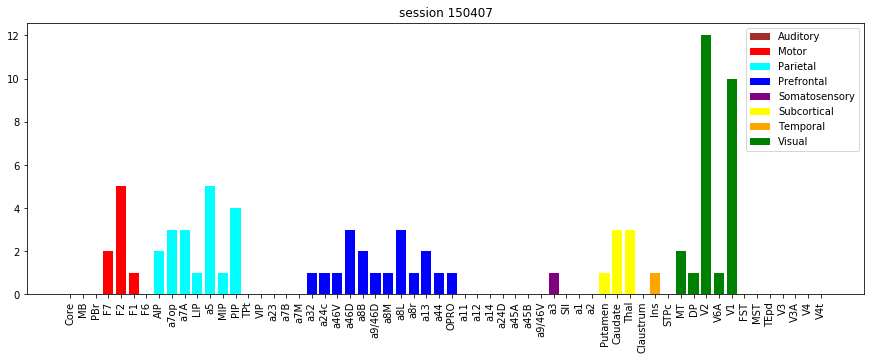

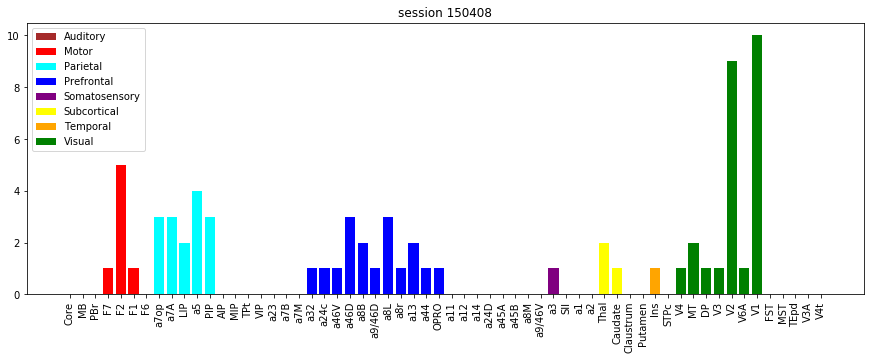

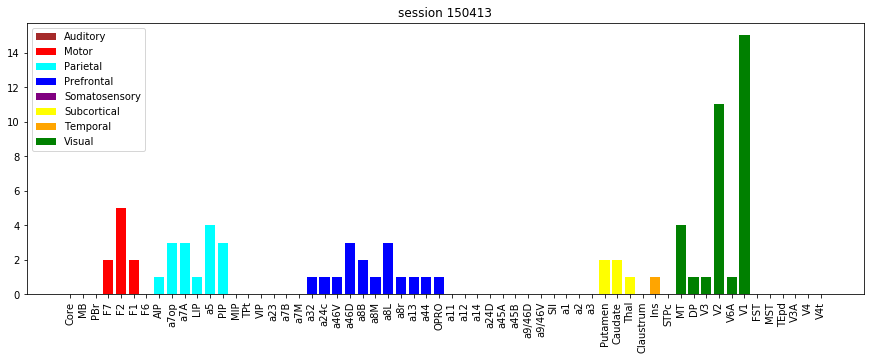

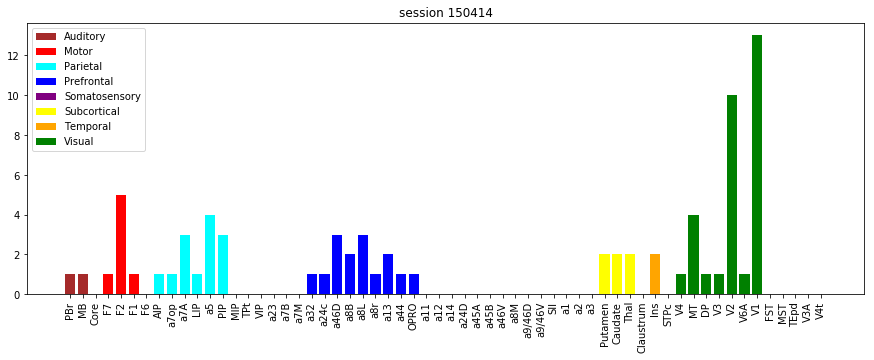

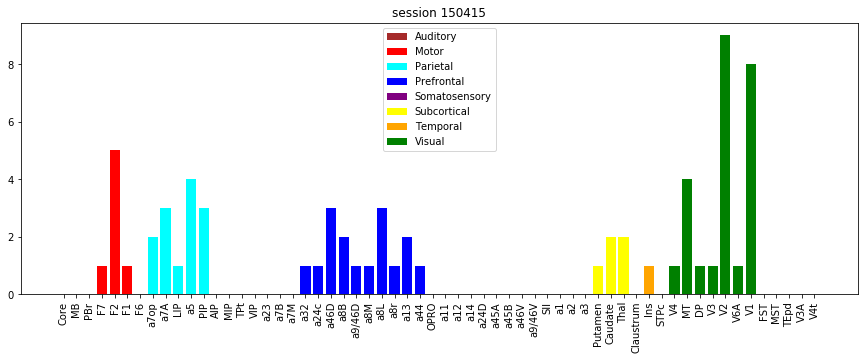

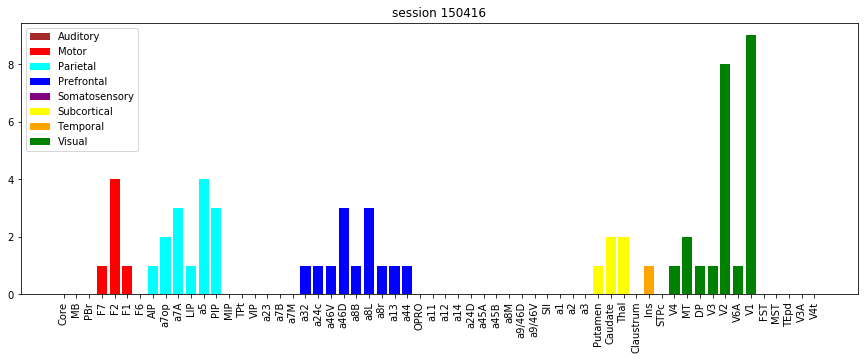

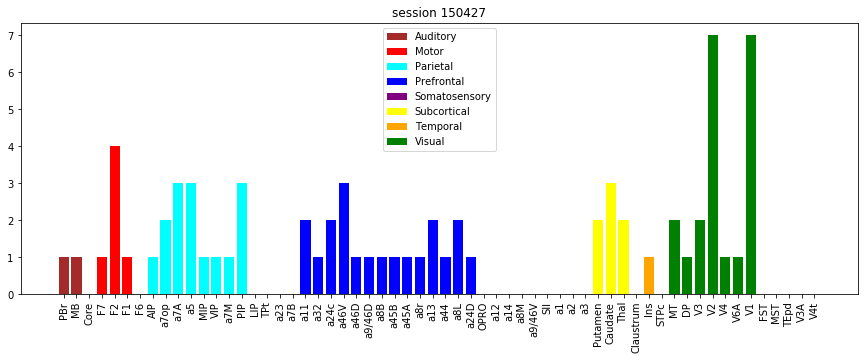

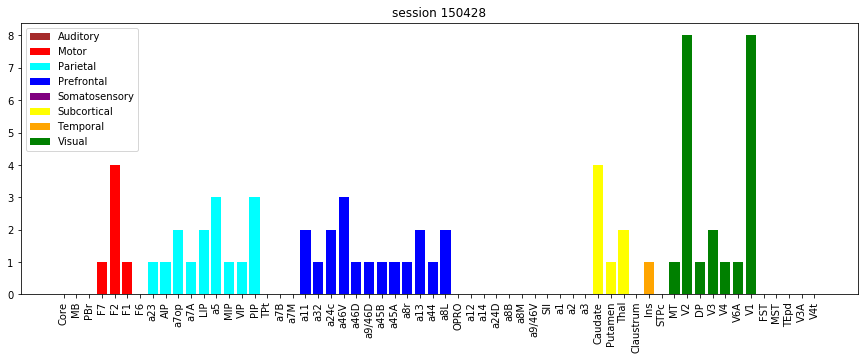

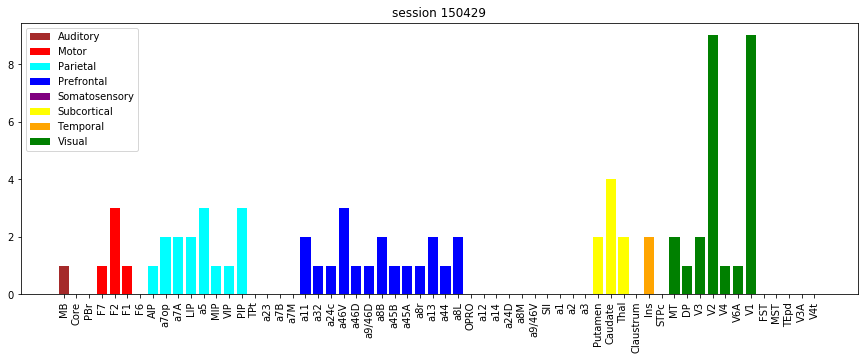

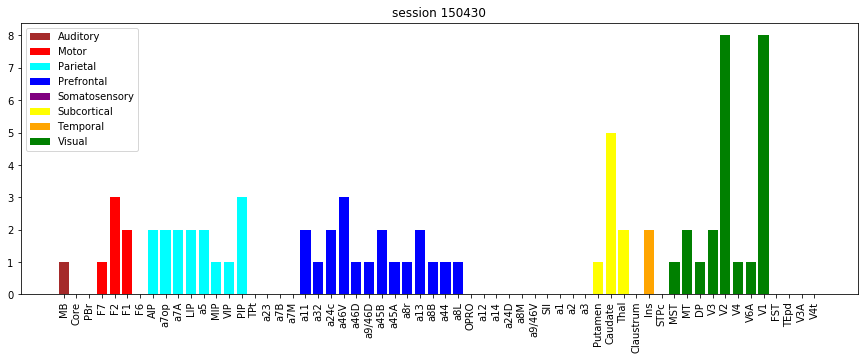

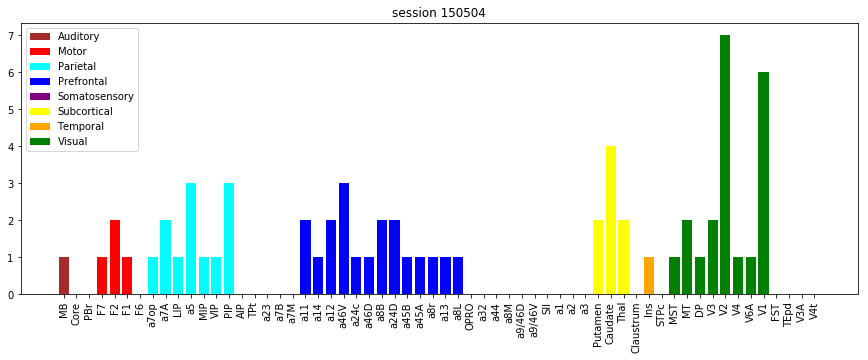

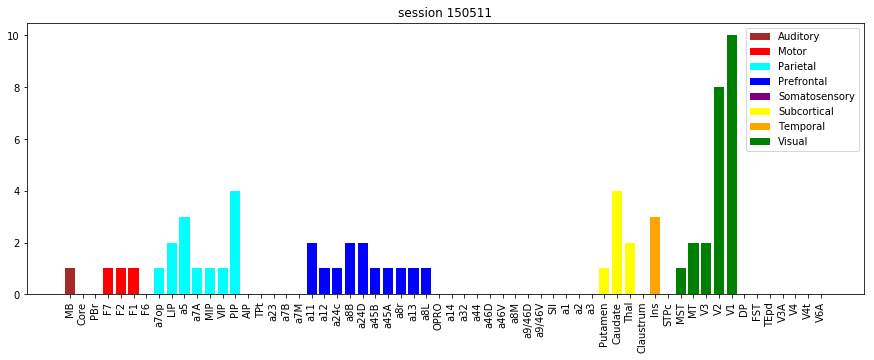

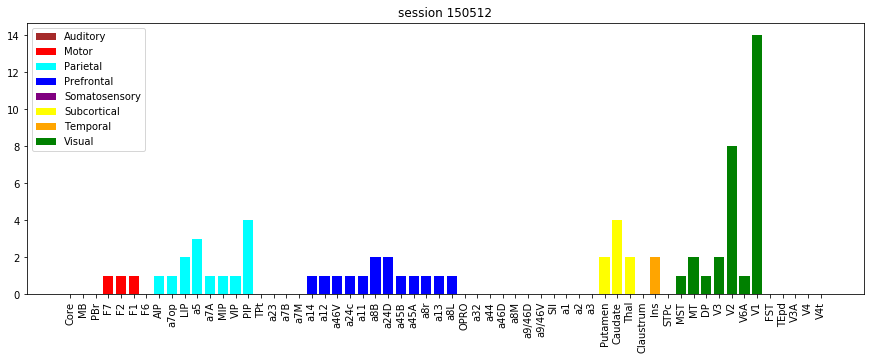

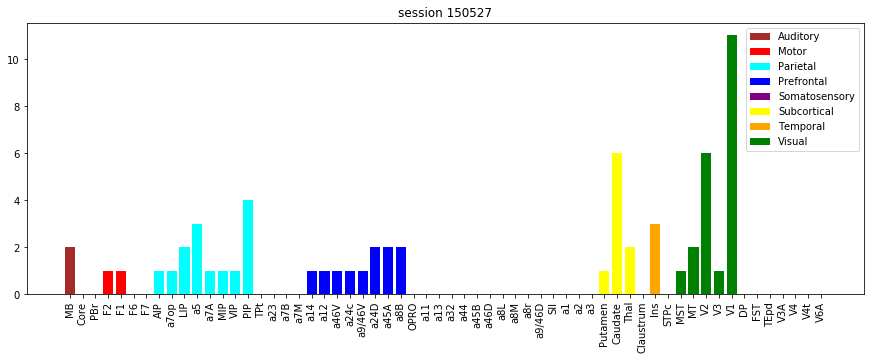

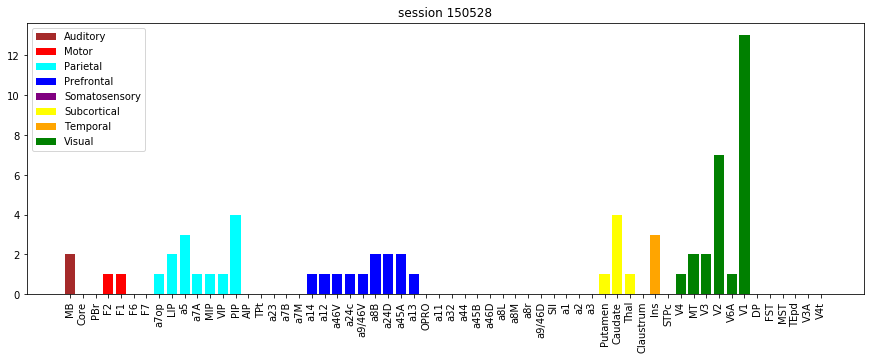

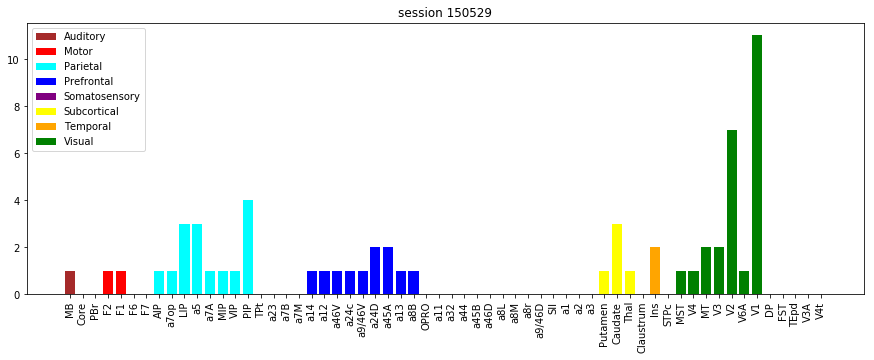

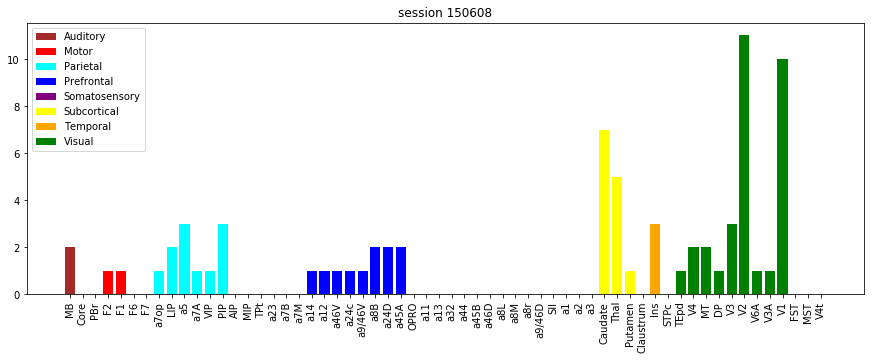

In [15]:
cortex = np.unique( data.cortex)
print(cortex)
all_areas = [ area for area in dico_area_to_cortex.keys() if dico_area_to_cortex[area] in cortex ]

for sess_no in session :
    # plot count of each electrode
    plt.figure(figsize=(15,5))  
#     grid = plt.GridSpec(1, 5, wspace=0.4, hspace=0.3)
#     plt.subplot(grid[0, :3])
    for c in cortex:
        curr_data = data[ (data.sess_no == sess_no) & (data.cortex == c)]
        area = curr_data['area']
        count = curr_data['count']
        color_code = curr_data['color_code']
        
        plt.bar(area, count, color=color_code)
        
    plt.legend(cortex)
    plt.title('session ' + sess_no)
    plt.xticks(rotation=90)
    
#     # plot count of each cortex    
#     plt.subplot(grid[0, 3:5])
    
#     for c in cortex :
#         curr_data = data[ (data.sess_no == sess_no) & (data.cortex == c)]
#         count = np.sum(curr_data['count'].values)
#         color_code = curr_data['color_code'].values[0]
        
#         plt.bar(c, count, color=color_code)

    
#     total = np.sum(data[ (data.sess_no == sess_no)]['count'].values )
#     plt.title('Total electrode = '+str(total) )
#     plt.xticks(rotation=45)
        
    
    plt.show()
        